Importing libraries.

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

Setting up the variables

In [2]:
hz = 1.0
sec = 1.0
ms = 0.001
rate = 35.0 * hz #firing rate is currently 35 spikes every second
#tau_ref = 5 * ms #refractory period is currently 0.005 seconds after each spike
tau_ref = 0
big_t = 1000 * sec #the total amount of time is currently 1000 seconds
window_1 = 10 * ms
window_2 = 50 * ms
window_3 = 100 * ms

Generating a spike train using a poisson process

In [3]:
def get_spike_train(rate, big_t, tau_ref):
    
    if 1 <= rate*tau_ref: #checking if the rate and refactory period are compatible (currently 0.0175 seconds)
        print("Firing rate not possible given refactory period f/p")
        return []
    
    exp_rate = rate/(1-tau_ref * rate)            #exp_rate = 35/(1-0.0175) = 35/0.825 = 42.424242...
    
    spike_train = []                              #Initialise empty spike array
    
    t = rnd.expovariate(exp_rate)                 #sampling first spike
    
    while t < big_t:
        spike_train.append(t)
        t += tau_ref + rnd.expovariate(exp_rate)
    
    return spike_train                            # return the list of spike timings

spike_train = get_spike_train(rate, big_t, tau_ref)

Below I calculate the Fano factor for the spike count. The Fano Factor is defined as $$F = variance / mean$$ .
To calculate it, you divide the spike train into intervals and work out he spike count for each interval

In [4]:
window_1 = 10 * ms 
window_2 = 50 * ms
window_3 = 100 * ms

def fano_factor(spike_train, window_size):
    
    num_windows = round(1000/window_size)
    
    histogram = np.histogram(spike_train, num_windows, (0, 1000))
    print("Number of spikes in each window: {}".format(histogram[0]))
    
    mean = np.mean(histogram[0])
    print("Mean number of spikes in each window: {}".format(mean))
    
    variance = np.var(histogram[0])
    print("Variance of the number of spikes in each window: {}".format(variance))
    
    fano_factor = variance/mean
    print("Fano Factor: {}".format(fano_factor))

In [5]:
fano_factor(spike_train, window_1)

Number of spikes in each window: [1 0 0 ..., 0 0 0]
Mean number of spikes in each window: 0.35077
Variance of the number of spikes in each window: 0.3513104071
Fano Factor: 1.0015406308977393


In [6]:
fano_factor(spike_train, window_2)

Number of spikes in each window: [3 2 1 ..., 1 1 1]
Mean number of spikes in each window: 1.75385
Variance of the number of spikes in each window: 1.7559601774999996
Fano Factor: 1.0012031687430507


In [7]:
fano_factor(spike_train, window_3)

Number of spikes in each window: [5 2 3 ..., 2 2 2]
Mean number of spikes in each window: 3.5077
Variance of the number of spikes in each window: 3.52734071
Fano Factor: 1.0055993129401033


In [8]:
def co_of_variation(spike_train):
    
    #Calculate time difference between successive spikes
    interspike_intervals = np.diff(spike_train)
    print("Interspike intervals: {}".format(interspike_intervals))
    
    mean = np.mean(interspike_intervals)
    print("Mean of interspike intervals: {}".format(mean))
    
    sd = np.std(interspike_intervals)
    print("Standard deviation of interspike intervals: {}".format(sd))
    
    coefficient_of_variation = sd/mean
    print("Coefficient of variation for interspike intervals: {}".format(coefficient_of_variation))

In [9]:
co_of_variation(spike_train)

Interspike intervals: [ 0.03257102  0.01296787  0.00180891 ...,  0.01891687  0.07665151
  0.00620028]
Mean of interspike intervals: 0.028508058889113903
Standard deviation of interspike intervals: 0.02855433137703943
Coefficient of variation for interspike intervals: 1.0016231370962685


In [10]:
def load_data(filename,T):

    data_array = [T(line.strip()) for line in open(filename, 'r')]

    return data_array


#spikes=[int(x) for x in load_data("rho.dat")]
spikes=load_data("rho.dat",int)

print(len(spikes))
print(spikes[0:5])

#stimulus=[float(x) for x in load_data("stim.dat")]
stimulus=load_data("stim.dat",float)

print(len(stimulus))
print(stimulus[0:5])

600000
[0, 0, 0, 0, 0]
600000
[-111.9482421875, -81.806640625, 10.2197265625, 83.3642578125, 69.375]


In [11]:
# Sampled every two milliseconds for twenty minutes. The data is a vector of 1's and 0's corresponding to
# the neuron firing or not firing. Want to calculate the Fano factor and the coefficient of variation for this
# spike train. 
# First calculate the number of milliseconds. 60 x 1000 = 60,000. 60,000 x 20 = 1200000 ms
# There will be 5 samples every 10ms, 25 samples every 50ms, and 50 samples every 100ms

# We want to therefore split the results into bins of size 10, 25, and 50
split_1 = 120000
split_2 = 24000
split_3 = 12000

def fano_factor_2(spike_train, split_size):
    
    binned_spikes = np.split(spike_train, split_size)
    print("Binned spikes: {}".format(binned_spikes))
    #print(len(binned_spikes[0]))
    
    sum_list = []
    
    for array in binned_spikes:
        sum_list.append(np.sum(array))
    
    mean = np.mean(sum_list)
    print("Mean spike count per {}ms interval: {}".format(600000/split_size, mean))

In [12]:
def convert_timings(spike_train):
    converted = []
    for n, i in enumerate(spike_train):
        if i == 1:
            converted.append(n * 0.002)
    return converted

In [13]:
fano_factor(convert_timings(spikes), window_1)

Number of spikes in each window: [0 0 0 ..., 1 0 0]
Mean number of spikes in each window: 0.44595
Variance of the number of spikes in each window: 0.4895185975
Fano Factor: 1.0976983910752325


In [14]:
fano_factor(convert_timings(spikes), window_2)

Number of spikes in each window: [2 6 5 ..., 0 0 2]
Mean number of spikes in each window: 2.22975
Variance of the number of spikes in each window: 6.397064937500001
Fano Factor: 2.8689606177822626


In [15]:
fano_factor(convert_timings(spikes), window_3)

Number of spikes in each window: [8 6 4 ..., 4 0 2]
Mean number of spikes in each window: 4.4595
Variance of the number of spikes in each window: 17.81575975
Fano Factor: 3.995012837762081


In [16]:
co_of_variation(convert_timings(spikes))

Interspike intervals: [ 0.01   0.006  0.012 ...,  0.226  0.01   0.012]
Mean of interspike intervals: 0.022385447761194027
Standard deviation of interspike intervals: 0.04496234341697251
Coefficient of variation for interspike intervals: 2.0085523370640965


# Question 3
Plot the spike-triggered average over a 100ms window. Responses to the stimulus are recorded every 2ms and so each window should include 50 stimulus recordings.

In [17]:
def spike_triggered_average(stimulus, spikes, interval):
    timings = convert_timings(spikes)
    averages = []
    for q in np.arange(0, interval, 2):
        average = 0
        N = 0
        for t in timings:
            index = int((t - q*ms)/(2*ms))
            if index >= 0:
                average = average + stimulus[index]
                N = N + 1
        
        averages.append(average/N)
    
    fig, ax = plt.subplots()
    ax.plot(np.arange(0, interval, 2), averages,'teal')
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    ax.grid(True, linestyle='-.')
    ax.tick_params(labelcolor='black', labelsize='small', width=1)
    ax.set_xlim([-10,100])
    ax.set_ylim([-2,35])

    plt.xlabel("Time before spike (milliseconds)", fontsize = 14)
    plt.ylabel("Average Stimulus", fontsize = 14)

    plt.savefig("Spike_Triggered_Average.png")
    plt.show()

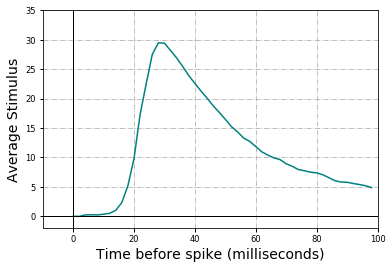

In [18]:
spike_triggered_average(stimulus, spikes, 100)